In [1]:
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

ae_path = os.path.join('../', 'src', 'autoencoder.py')
sys.path.append(os.path.dirname(ae_path))
from autoencoder import ConvAutoencoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [2]:
# Transform the dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
data_path = os.path.join('../', 'data')
train_data = datasets.FashionMNIST(root=data_path, train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root=data_path, train=False, download=True, transform=transform)


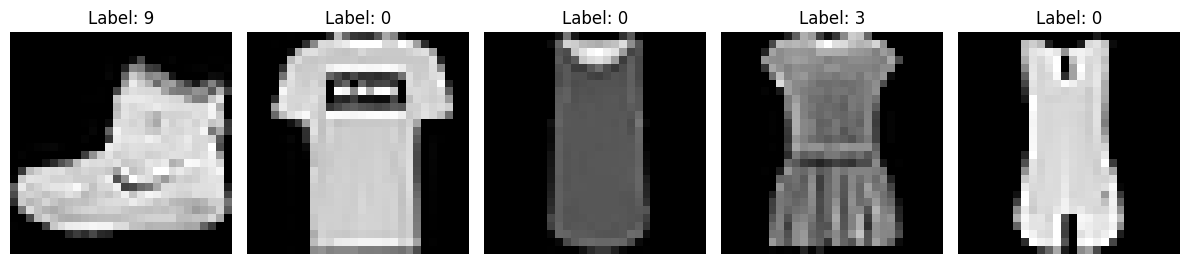

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    img, label = train_data[i]
    axes[i].imshow(img[0], cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2)


In [6]:
autoencoder = ConvAutoencoder(latent_dim=128).to(device)


In [7]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=2e-3)

In [8]:
def train_epoch(autoencoder, train_loader, criterion, optimizer, device):
    autoencoder.train()
    running_loss = 0.0
    for data, _ in tqdm(train_loader, desc='Training'):
        data = data.to(device)

        # Forward pass
        outputs = autoencoder(data)
        loss = criterion(outputs, data)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    return epoch_loss

In [9]:
def val_epoch(autoencoder, test_loader, criterion, device):
    autoencoder.eval()
    running_loss = 0.0
    with torch.no_grad():
        for data, _ in tqdm(test_loader, desc='Validation'):
            data = data.to(device)

            outputs = autoencoder(data)
            loss = criterion(outputs, data)

            running_loss += loss.item()

    epoch_loss = running_loss / len(test_loader)
    return epoch_loss

Validation: 100%|██████████| 157/157 [00:03<00:00, 39.31it/s] 


Epoch 1/20, Train loss: 0.0502, Val loss: 0.0275


Validation: 100%|██████████| 157/157 [00:04<00:00, 39.12it/s] 


Epoch 2/20, Train loss: 0.0234, Val loss: 0.0211


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.99it/s] 


Epoch 3/20, Train loss: 0.0190, Val loss: 0.0183


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.80it/s] 


Epoch 4/20, Train loss: 0.0168, Val loss: 0.0172


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.76it/s] 


Epoch 5/20, Train loss: 0.0155, Val loss: 0.0158


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.99it/s] 


Epoch 6/20, Train loss: 0.0147, Val loss: 0.0149


Validation: 100%|██████████| 157/157 [00:03<00:00, 40.29it/s] 


Epoch 7/20, Train loss: 0.0141, Val loss: 0.0149


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.45it/s] 


Epoch 8/20, Train loss: 0.0136, Val loss: 0.0142


Validation: 100%|██████████| 157/157 [00:03<00:00, 40.11it/s] 


Epoch 9/20, Train loss: 0.0133, Val loss: 0.0139


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.77it/s] 


Epoch 10/20, Train loss: 0.0129, Val loss: 0.0142


Validation: 100%|██████████| 157/157 [00:03<00:00, 39.62it/s] 


Epoch 11/20, Train loss: 0.0127, Val loss: 0.0135


Validation: 100%|██████████| 157/157 [00:04<00:00, 37.63it/s] 


Epoch 12/20, Train loss: 0.0124, Val loss: 0.0134


Validation: 100%|██████████| 157/157 [00:04<00:00, 35.56it/s] 


Epoch 13/20, Train loss: 0.0122, Val loss: 0.0133


Validation: 100%|██████████| 157/157 [00:04<00:00, 38.31it/s] 


Epoch 14/20, Train loss: 0.0121, Val loss: 0.0131


Validation: 100%|██████████| 157/157 [00:04<00:00, 38.24it/s] 


Epoch 15/20, Train loss: 0.0119, Val loss: 0.0130


Validation: 100%|██████████| 157/157 [00:04<00:00, 38.77it/s] 


Epoch 16/20, Train loss: 0.0118, Val loss: 0.0130


Validation: 100%|██████████| 157/157 [00:04<00:00, 35.85it/s] 


Epoch 17/20, Train loss: 0.0117, Val loss: 0.0129


Validation: 100%|██████████| 157/157 [00:04<00:00, 37.09it/s] 


Epoch 18/20, Train loss: 0.0116, Val loss: 0.0128


Validation: 100%|██████████| 157/157 [00:04<00:00, 37.43it/s] 


Epoch 19/20, Train loss: 0.0115, Val loss: 0.0127


Validation: 100%|██████████| 157/157 [00:04<00:00, 38.20it/s] 

Epoch 20/20, Train loss: 0.0114, Val loss: 0.0129


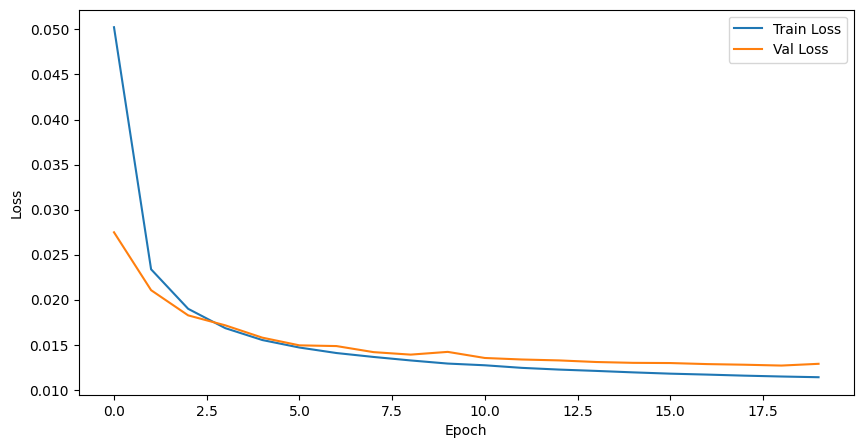

In [10]:
epochs = 20

train_losses = []
val_losses = []

for epoch in range(epochs):
    train_loss = train_epoch(autoencoder, train_loader, criterion, optimizer, device)
    val_loss = val_epoch(autoencoder, test_loader, criterion, device)
    print(f"Epoch {epoch+1}/{epochs}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
save_path = os.path.join('../models', 'conv_autoencoder_fashionmnist.pth')
os.makedirs(os.path.dirname(save_path), exist_ok=True)
torch.save(autoencoder.state_dict(), save_path)

In [12]:
def visualize_reconstructions(autoencoder, data_loader, device, num_images=5):
    autoencoder.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)
    images = images.to(device)

    with torch.no_grad():
        outputs = autoencoder(images)

    images = images.cpu().numpy()
    outputs = outputs.cpu().numpy()

    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    for i in range(num_images):
        axes[0, i].imshow(images[i][0], cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        axes[1, i].imshow(outputs[i][0], cmap='gray')
        axes[1, i].set_title('Reconstructed')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

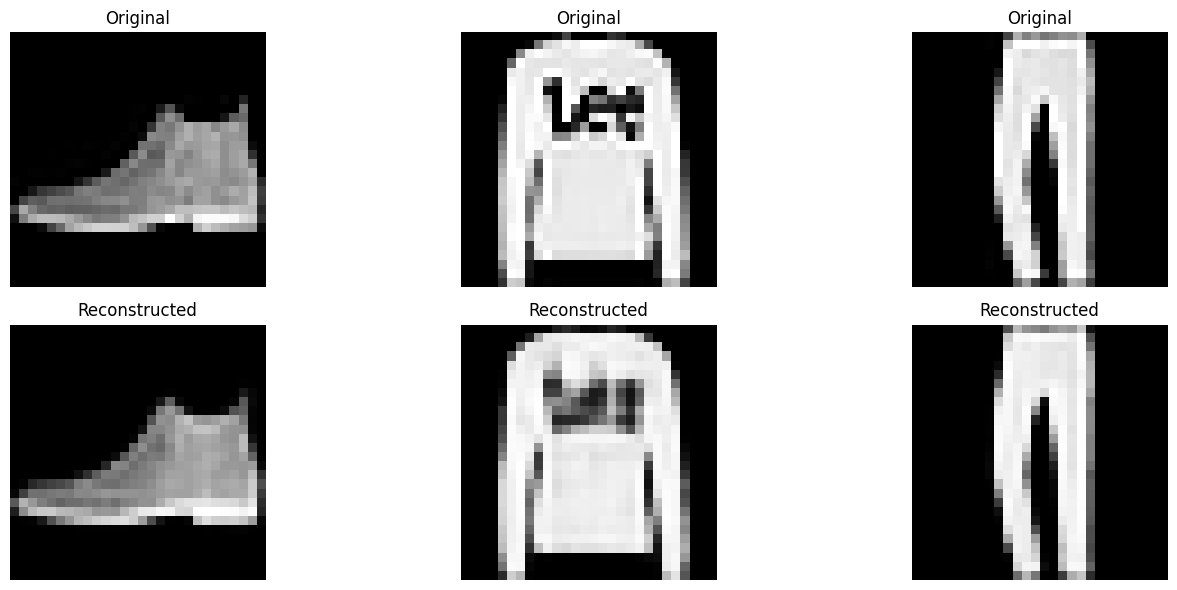

In [15]:
visualize_reconstructions(autoencoder, test_loader, device, num_images=3)